# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [27]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [28]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [29]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [56]:
#仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
app_train['AGE'] = (app_train['DAYS_BIRTH']/365).apply(int)
#app_train.sort_values(by='AGE').head(20)

rule=range(0,110,10)
app_train['AGE_GRP'] = pd.cut(app_train['AGE'], rule)
app_train['AGE_GRP'].value_counts().sort_index()

(0, 10]          0
(10, 20]         1
(20, 30]     52805
(30, 40]     83117
(40, 50]     74401
(50, 60]     67819
(60, 70]     29368
(70, 80]         0
(80, 90]         0
(90, 100]        0
Name: AGE_GRP, dtype: int64

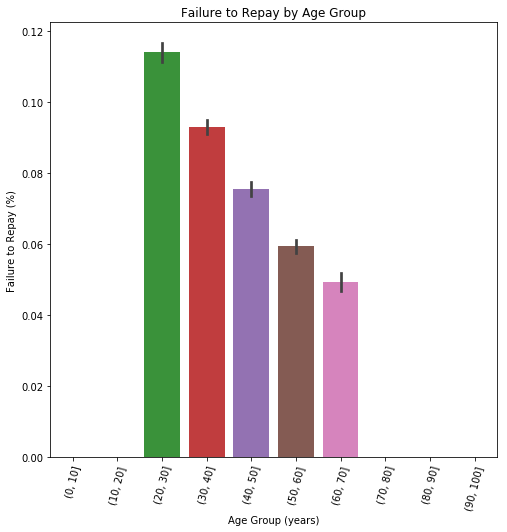

In [60]:
import seaborn as sns

plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = app_train['AGE_GRP']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [61]:
#app_train['AMT_INCOME_TOTAL_RANGE'] 

#app_train['AMT_INCOME_TOTAL'].describe()
#max = 117000000
#min = 25650
#25% = 112500
#50% = 147150
#75% = 202500

#做等頻劃分
app_train["equal_freq_AMT_INCOME_TOTAL"] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)
app_train["equal_freq_AMT_INCOME_TOTAL"].value_counts().sort_index()

(25649.999, 81000.0]       33391
(81000.0, 99000.0]         30280
(99000.0, 112500.0]        36907
(112500.0, 135000.0]       48849
(135000.0, 147150.0]        4333
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(180000.0, 225000.0]       44809
(225000.0, 270000.0]       19957
(270000.0, 117000000.0]    27161
Name: equal_freq_AMT_INCOME_TOTAL, dtype: int64

In [68]:
#做等寬劃分
amt_income_total_max = app_train['AMT_INCOME_TOTAL'].max()
grp_rule = [0, 10000, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000,1000000,  amt_income_total_max]
app_train["AMT_INCOME_TOTAL_GRP"] = pd.cut(app_train['AMT_INCOME_TOTAL'], grp_rule)
app_train["AMT_INCOME_TOTAL_GRP"].value_counts().sort_index()

(0.0, 10000.0]                  0
(10000.0, 50000.0]           4517
(50000.0, 100000.0]         59181
(100000.0, 150000.0]        91591
(150000.0, 200000.0]        64307
(200000.0, 250000.0]        48137
(250000.0, 300000.0]        17039
(300000.0, 350000.0]         8874
(350000.0, 400000.0]         5802
(400000.0, 450000.0]         4924
(450000.0, 500000.0]          437
(500000.0, 1000000.0]        2452
(1000000.0, 117000000.0]      250
Name: AMT_INCOME_TOTAL_GRP, dtype: int64

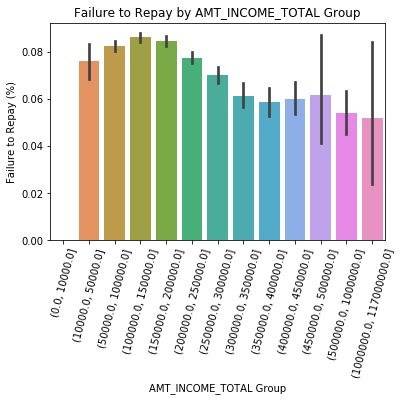

In [69]:
px = app_train['AMT_INCOME_TOTAL_GRP']
py = app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('AMT_INCOME_TOTAL Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by AMT_INCOME_TOTAL Group');